# Import necessary libraries

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, roc_curve
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder



# Load the data


In [99]:
df = pd.read_csv('data/LoanTap_LogisticReg.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"



# Exploratory Data Analysis


In [100]:
print("Shape of the data:", df.shape,"\n")
print("Data types:")
print(df.dtypes, sep=",")

Shape of the data: (396030, 27) 

Data types:
loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object


In [101]:
print("Missing values:")
print(df.isnull().sum())


Missing values:
loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64


In [102]:
print("Statistical summary:")
print(df.describe())

Statistical summary:
           loan_amnt       int_rate    installment    annual_inc  \
count  396030.000000  396030.000000  396030.000000  3.960300e+05   
mean    14113.888089      13.639400     431.849698  7.420318e+04   
std      8357.441341       4.472157     250.727790  6.163762e+04   
min       500.000000       5.320000      16.080000  0.000000e+00   
25%      8000.000000      10.490000     250.330000  4.500000e+04   
50%     12000.000000      13.330000     375.430000  6.400000e+04   
75%     20000.000000      16.490000     567.300000  9.000000e+04   
max     40000.000000      30.990000    1533.810000  8.706582e+06   

                 dti       open_acc        pub_rec     revol_bal  \
count  396030.000000  396030.000000  396030.000000  3.960300e+05   
mean       17.379514      11.311153       0.178191  1.584454e+04   
std        18.019092       5.137649       0.530671  2.059184e+04   
min         0.000000       0.000000       0.000000  0.000000e+00   
25%        11.280000      

* Distribution of the target variable


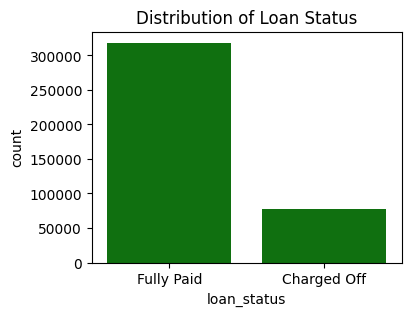

In [103]:
plt.figure(figsize=(4,3))
sns.countplot(x='loan_status', data=df, color='green')
plt.title('Distribution of Loan Status')
plt.show()


In [104]:
def identify_column_types(df):
    """
    Identifies continuous and categorical columns in a Pandas DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame to analyze.

    Returns:
        tuple: Two lists:
            - continuous_cols: List of column names identified as continuous.
            - categorical_cols: List of column names identified as categorical.
    """

    continuous_cols = []
    categorical_cols = []

    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:  # Adjust data types as needed
            continuous_cols.append(col)
        else:
            categorical_cols.append(col)

    return continuous_cols, categorical_cols
continuous_vars, categorical_vars = identify_column_types(df)


* Distribution plots for continuous variables


['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']


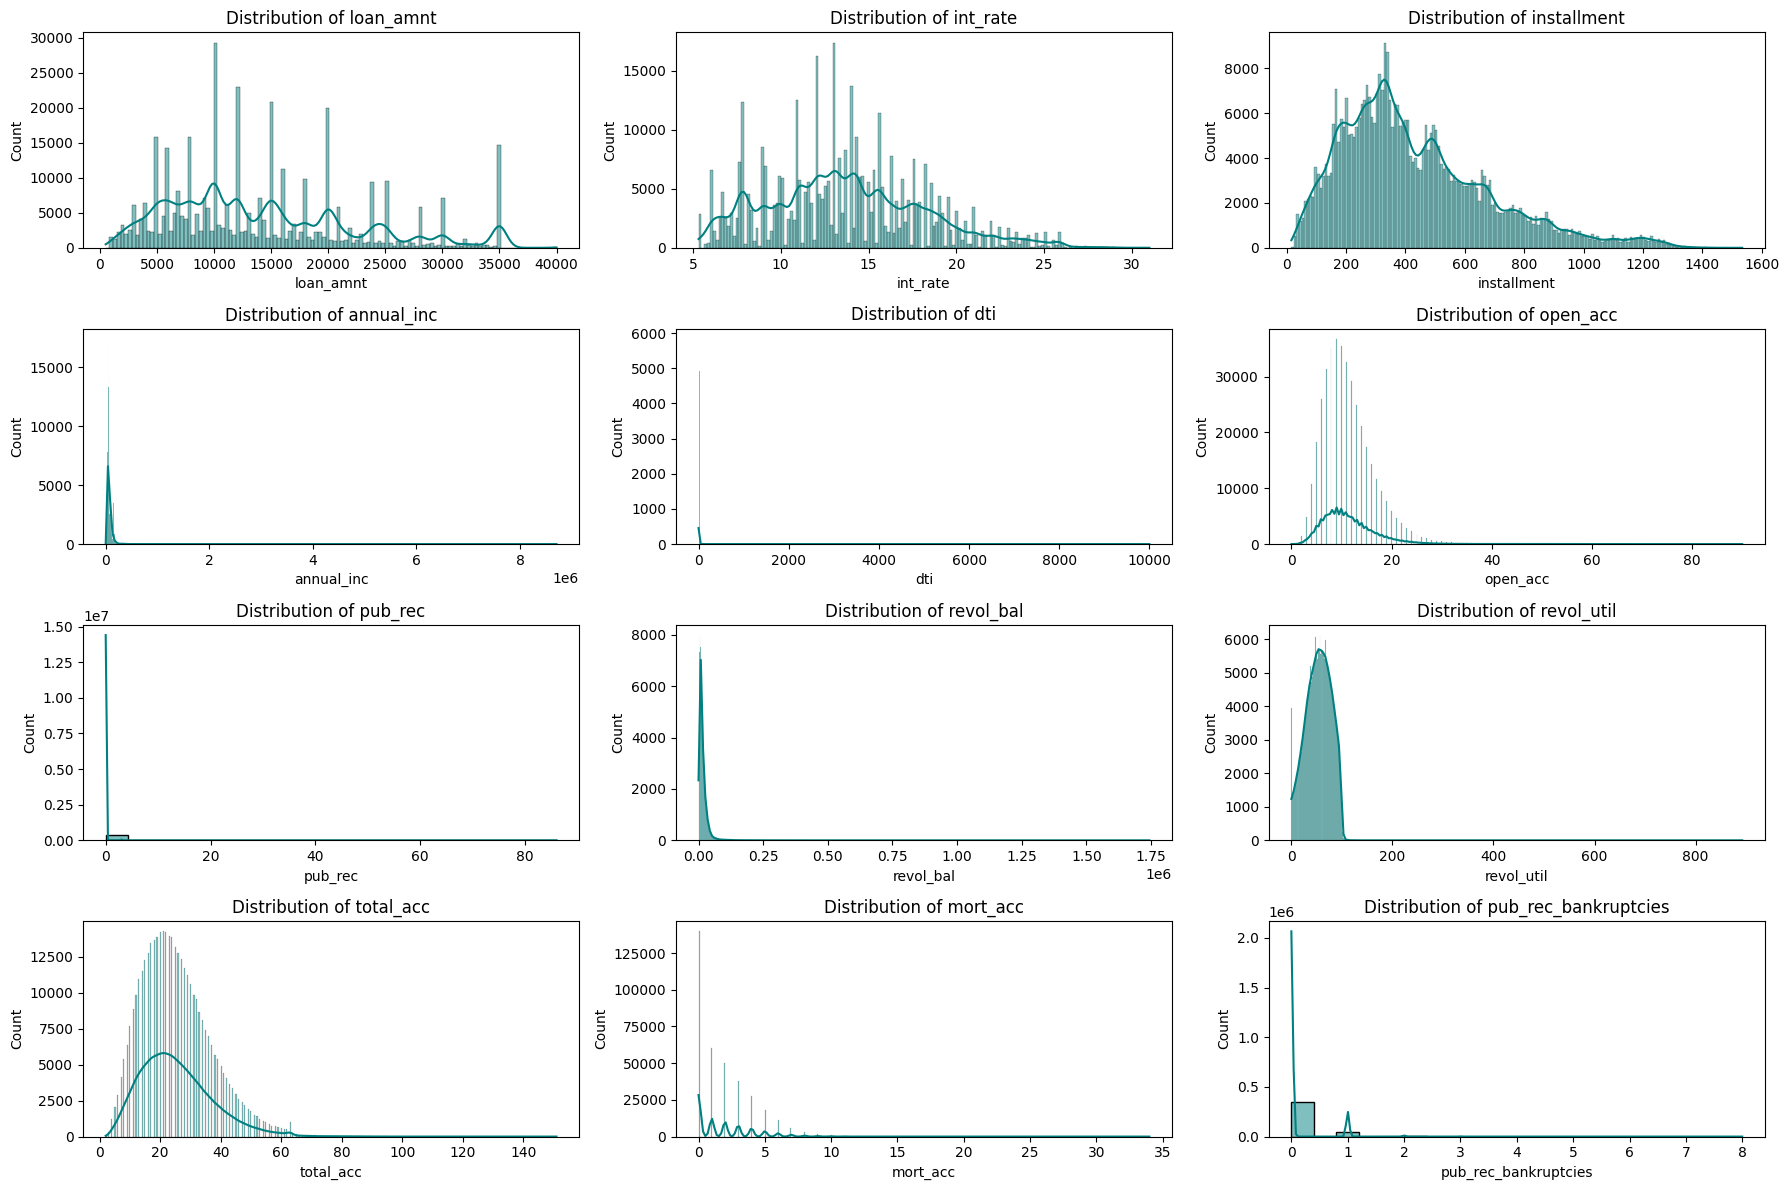

In [105]:
# continuous_vars = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'total_acc']
print(continuous_vars)
# Calculate the number of rows and columns for subplots to fit all variables
num_plots = len(continuous_vars)
num_cols = 3  # Adjust as needed
num_rows = int(np.ceil(num_plots / num_cols)) 

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 6, num_rows * 3))

# Iterate through continuous variables and create histograms on subplots
for i, var in enumerate(continuous_vars):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(df[var], kde=True, color='teal', ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {var}')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()



* Count plots for categorical variables


In [106]:
# categorical_vars = ['term', 'grade', 'home_ownership', 'verification_status', 'purpose']
print(categorical_vars)
# Calculate the number of rows and columns for subplots to fit all variables
num_plots = len(categorical_vars)
num_cols = 3  # Adjust as needed
num_rows = int(np.ceil(num_plots / num_cols))

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 8, num_rows * 5))

# Iterate through categorical variables and create count plots on subplots
for i, var in enumerate(categorical_vars):
    row = i // num_cols
    col = i % num_cols
    sns.countplot(x=var, data=df, hue='loan_status', ax=axes[row, col])
    axes[row, col].set_title(f'Loan Status by {var}')
    axes[row, col].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'earliest_cr_line', 'initial_list_status', 'application_type', 'address']



# Data Preprocessing
* Handle missing values


In [79]:
"""
# Mean imputation for numerical columns
numerical_cols = continuous_vars # ['loan_amnt', 'int_rate', 'annual_inc']  # Replace with your actual numerical columns
imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# KNN imputation for numerical columns (alternative)
imputer = KNNImputer(n_neighbors=5)  # Adjust n_neighbors as needed
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Mode imputation for categorical columns
# categorical_cols = ['term', 'grade']  # Replace with your actual categorical columns
imputer = SimpleImputer(strategy='most_frequent')
df[categorical_vars] = imputer.fit_transform(df[categorical_vars])

# Display the first few rows after imputation
"""

df = df.dropna() # or use imputation methods if appropriate
df.head(2)

   loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.0   36 months     11.44       329.48     B        B4   
1     8000.0   36 months     11.99       265.68     B        B5   

         emp_title emp_length home_ownership  annual_inc  ... open_acc  \
0        Marketing  10+ years           RENT    117000.0  ...     16.0   
1  Credit analyst     4 years       MORTGAGE     65000.0  ...     17.0   

  pub_rec revol_bal revol_util total_acc  initial_list_status  \
0     0.0   36369.0       41.8      25.0                    w   
1     0.0   20131.0       53.3      27.0                    f   

  application_type  mort_acc  pub_rec_bankruptcies  \
0       INDIVIDUAL       0.0                   0.0   
1       INDIVIDUAL       3.0                   0.0   

                                             address  
0     0174 Michelle Gateway\r\nMendozaberg, OK 22690  
1  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113  

[2 rows x 27 columns]


# Feature engineering


In [80]:
df['pub_rec_flag'] = (df['pub_rec'] > 1).astype(int)
df['mort_acc_flag'] = (df['mort_acc'] > 1).astype(int)
df['pub_rec_bankruptcies_flag'] = (df['pub_rec_bankruptcies'] > 1).astype(int)


* Encode categorical variables


In [81]:
df = pd.get_dummies(df, columns=['term', 'grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type'])
df.head(2)

,loan_amnt,int_rate,installment,sub_grade,emp_title,emp_length,annual_inc,issue_d,loan_status,title,...,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w,application_type_DIRECT_PAY,application_type_INDIVIDUAL,application_type_JOINT
0,10000.0,11.44,329.48,B4,Marketing,10+ years,117000.0,Jan-2015,Fully Paid,Vacation,...,False,False,False,True,False,False,True,False,True,False
1,8000.0,11.99,265.68,B5,Credit analyst,4 years,65000.0,Jan-2015,Fully Paid,Debt consolidation,...,False,False,False,False,False,True,False,False,True,False


# Scale numerical features


In [82]:
scaler = StandardScaler()
numerical_features = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'total_acc']
df[numerical_features] = scaler.fit_transform(df[numerical_features])
print(df.shape)
df.columns

(396030, 60)


Index(['loan_amnt', 'int_rate', 'installment', 'sub_grade', 'emp_title',
       'emp_length', 'annual_inc', 'issue_d', 'loan_status', 'title', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'pub_rec_flag', 'mort_acc_flag', 'pub_rec_bankruptcies_flag',
       'term_ 36 months', 'term_ 60 months', 'grade_A', 'grade_B', 'grade_C',
       'grade_D', 'grade_E', 'grade_F', 'grade_G', 'home_ownership_ANY',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purp

# Model Building
* Prepare the data for modeling


In [85]:
X = df.drop(['loan_status', 'emp_title', 'issue_d', 'title', 'earliest_cr_line', 'address', 'sub_grade', 'emp_length'], axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dict(X_train[:2])

{'loan_amnt': 320024    1.302567
 282427   -0.252935
 Name: loan_amnt, dtype: float64,
 'int_rate': 320024   -1.173797
 282427   -1.285600
 Name: int_rate, dtype: float64,
 'installment': 320024    1.420149
 282427   -0.225024
 Name: installment, dtype: float64,
 'annual_inc': 320024    0.175166
 282427    0.807898
 Name: annual_inc, dtype: float64,
 'dti': 320024   -0.352377
 282427   -0.364032
 Name: dti, dtype: float64,
 'open_acc': 320024   -0.449847
 282427    0.523362
 Name: open_acc, dtype: float64,
 'pub_rec': 320024    0.0
 282427    0.0
 Name: pub_rec, dtype: float64,
 'revol_bal': 320024    0.101908
 282427    0.348462
 Name: revol_bal, dtype: float64,
 'revol_util': 320024    37.1
 282427    46.3
 Name: revol_util, dtype: float64,
 'total_acc': 320024   -0.287268
 282427    0.385738
 Name: total_acc, dtype: float64,
 'mort_acc': 320024    4.0
 282427    3.0
 Name: mort_acc, dtype: float64,
 'pub_rec_bankruptcies': 320024    0.0
 282427    0.0
 Name: pub_rec_bankruptcies, dt

# Build the logistic regression model


In [87]:
model = LogisticRegression(random_state=42)

model.fit(X_train, y_train)

        loan_amnt  int_rate  installment  annual_inc       dti  open_acc  \
282427  -0.252935 -1.285600    -0.225024    0.807898 -0.364032  0.523362   
103275   1.087190  0.078396     0.430189    1.067480 -0.118181  0.523362   

        pub_rec  revol_bal  revol_util  total_acc  ...  purpose_other  \
282427      0.0   0.348462        46.3   0.385738  ...          False   
103275      1.0   0.846233        53.5   1.311120  ...          False   

        purpose_renewable_energy  purpose_small_business  purpose_vacation  \
282427                     False                   False             False   
103275                     False                   False             False   

        purpose_wedding  initial_list_status_f  initial_list_status_w  \
282427            False                  False                   True   
103275            False                  False                   True   

        application_type_DIRECT_PAY  application_type_INDIVIDUAL  \
282427                      

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [52]:
print("Model coefficients:")
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {coef}")

ValueError: could not convert string to float: 'A5'

# Results Evaluation


In [ ]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

# ROC AUC Curve


In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve


In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


# Questionnaire Answers:

* 1. The percentage of customers who have fully paid their loan can be calculated as:

In [ ]:
fully_paid_pct = df['loan_status'].value_counts(normalize=True)['Fully Paid'] * 100
print(f"{fully_paid_pct:.2f}% of customers have fully paid their loan.")

* 2. To check the correlation between loan amount and installment:


In [ ]:
print("Correlation between loan amount and installment:")
print(df[['loan_amnt', 'installment']].corr())


* 3. The majority of people likely have home ownership as "MORTGAGE" or "RENT". This can be verified by:
python

In [ ]:
print("Home ownership distribution:")
print(df['home_ownership'].value_counts(normalize=True))

* 4. To check if people with grade 'A' are more likely to fully pay their loan:


In [ ]:
grade_a_pct = df[(df['grade'] == 'A') & (df['loan_status'] == 'Fully Paid')].shape[0] / df[df['grade'] == 'A'].shape[0] * 100
print(f"{grade_a_pct:.2f}% of people with grade 'A' have fully paid their loan.")


* 5. To find the top 2 afforded job titles:


In [ ]:

top_job_titles = df['emp_title'].value_counts().head(2)
print("Top 2 afforded job titles:")
print(top_job_titles)


From a bank's perspective, the primary focus should be on precision to minimize the risk of default.

A gap in precision and recall affects the bank by creating a tradeoff between risk (false positives) and opportunity (false negatives).

The features that heavily affected the outcome can be determined from the model coefficients.

Results may be affected by geographical location if there are significant regional economic differences.

